In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import time
import math

% matplotlib inline

### Spin-glass update rule

#### $\sigma _ { \mathrm { i } } \rightarrow \operatorname { sgn } \left[ \sum _ { \mathrm { j } } W _ { \mathrm { i }\mathrm{ j} } \sigma _ { \mathrm { j } } - \theta _ { \mathrm { i } } \right]$

In [2]:
#parameters
N = 10  #spins
W = np.random.randn(N,N)  #Wij
theta = 0  #threshold
spins = np.random.choice((-1,1),N)

In [3]:
#iterations
rep = 10000  #length of simulation
for r in range(0,rep):
    p = np.random.randint(0,N)
    h = np.sign(np.sum(W[:,p]*spins[p])-theta)
    spins[p] = h

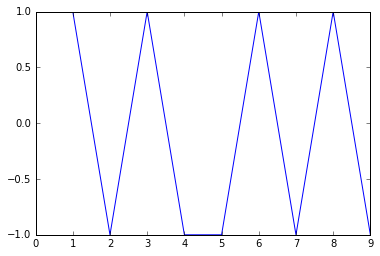

In [4]:
#lot spins
plt.plot(spins)

### Hopfield model

Energy function with memory patterns written in: 

#### $E = - \frac { W } { 2 } \sum _ { \mathrm { ij } } \sigma _ { \mathrm { i } } \left[ \sum _ { \mu = 1 } ^ { K } \xi _ { \mathrm { i } } ^ { ( \mu ) } \xi _ { \mathrm { j } } ^ { ( \mu ) } \right] \sigma _ { \mathrm { j } } = - \frac { W } { 2 } \sum _ { \mu = 1 } ^ { K } \left( \xi ^ { ( \mu ) } \cdot \sigma \right) ^ { 2 }$

In [312]:
#memory and patterns
N = 10
Wm = np.zeros((N,N))  #trained weights
K = 3  #patterns
ww = 1  #normalization constant?
patterns = np.zeros((K,N))
for k in range(0,K):
    eps = np.expand_dims(np.random.choice((-1,1),N),axis=1)#np.expand_dims(np.array(inputs[k]),axis=1) #
    patterns[k,:] = np.squeeze(eps)
    #lesson = eps.T*eps
    #np.fill_diagonal(lesson,0)
    #Wm = Wm + ww*lesson
    for i in range(len(eps)):
        for j in range(i,len(eps)):
            if i == j:
                Wm[i,j] = 0
            else:
                Wm[i,j] = ww*eps[i]*eps[j]
                Wm[j,i] = Wm[i,j]


In [31]:
#recall
# mu = 3
# theta = 0  #threshold
# rep = 50000  #length of simulation
# spins = np.random.randint(0,2,size=N)
# spins[spins==0] = -1
# for r in range(0,rep):
#     p = np.random.randint(0,N)
#     h = np.sign(np.sum(Wm[:,p]*spins[p])-theta)
#     if h==0:
#         temp = np.random.choice((-1,1))
#         spins[p] = temp
#     else:
#         spins[p] = h
#     #spins[p] = h

In [313]:
##recall
###synchronous update
probes = 5
recalls = np.zeros((probes,N))
for p in range(0,probes):
    recall = np.random.choice((-1,1),size=N)
    res = Wm @ recall
    res = np.sign(res-theta)
    recalls[p,:] = res

In [321]:
###asynchronous update
probes = 1
recalls = np.zeros((probes,N))
for pp in range(0,probes):
    spins = patterns[2,:]#np.random.choice((-1,1),N)  #start with random or a given pattern (stable)
    for r in range(0,rep):
        p = np.random.randint(0,N)
        h = np.sign(np.sum(W[:,p]*spins[p])-theta)
        spins[p] = h
    recalls[pp,:] = spins

([], <a list of 0 Text yticklabel objects>)

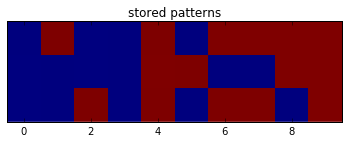

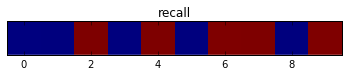

In [322]:
plt.imshow(patterns,interpolation='None')
plt.title('stored patterns')
plt.yticks([])
plt.figure()
plt.title('recall')
plt.imshow(recalls,interpolation='None')
plt.yticks([])

### Recall measure

$m _ { s } = \max _ { \mu } \frac { 1 } { N } \left| \xi ^ { ( \mu ) } \cdot \sigma _ { s } \right|$

In [323]:
def ms(patterns,recall):
    """
    return the max of normalized dot product between trained and recalled pattern
    """
    dots = np.zeros(patterns.shape[0])  #number of patterns stored
    nn = patterns.shape[1]  #number of neurons in the model
    for m in range(0,patterns.shape[0]):
        dots[m] = np.abs(np.dot(patterns[m,:],recall))
    return np.max(dots)/nn #(patterns.shape[0]*patterns.shape[1])

In [359]:
def Hopfield(K,N):
    """
    Hopfield network with N neurons and trained with K random spin patterns,
    The output is one recall pattern starting from a random initial condition and the actualy patterns
    """
    ###training  #with N neurons and K patterns
    theta = 0
    ww = 1 #normalization constant?
    Wm = np.zeros((N,N))  #trained weights
    patterns = np.zeros((K,N))  #stored patterns
    for k in range(0,K):
        eps = np.expand_dims(np.random.choice((-1,1),N),axis=1)
        patterns[k,:] = np.squeeze(eps)
        for i in range(len(eps)):
            for j in range(i,len(eps)):
                if i == j:
                    Wm[i,j] = 0
                else:
                    Wm[i,j] = ww*eps[i]*eps[j]
                    Wm[j,i] = Wm[i,j]
    ###recall
#     spins = np.random.choice((-1,1),N)
#     res = np.dot(Wm, spins)
#     recall = np.sign(res-theta)

#     recall = np.random.choice((-1,1),N)
#     rep = 500  #repeat simulation of random updates
#     for r in range(0,rep):
#         p = np.random.randint(0,N)
#         h = np.sign(np.sum(Wm[:,p]*recall[p])-theta)
#         recall[p] = h
    
    rep = 100
    recall = np.random.choice((-1,1),N) 
    for _ in range(rep):
        for i in range(0,N):
            recall[i] = 1.0 if np.dot(Wm[i], recall) > 0 else -1.0
    return patterns, recall

In [305]:
N=2000
ms((np.random.choice((-1,1),10*N)).reshape(10,N), np.random.choice((-1,1),N))

0.026

In [354]:
N = 10
R = 5
mss = np.zeros((5,R))
for kk in range(0,mss.shape[0]):  #scan through number of patterns
    for rr in range(0,mss.shape[1]):  #repeat the simulation
        patterns, recall = Hopfield(kk+1,N)
        mss[kk,rr] = ms(patterns,recall)

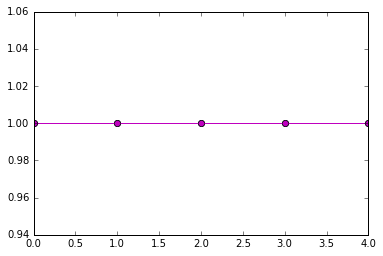

In [355]:
plt.plot(mss,'-o');

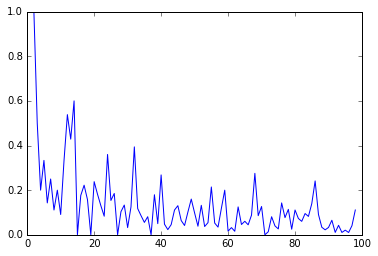

In [152]:
nn = np.arange(1,100,1)
temp = []
for ii in nn:
    temp1 = np.random.choice((-1,1),ii)
    temp2 = np.random.choice((-1,1),ii)
    temp.append(np.abs(np.dot(temp1,temp2)/ii))
plt.plot(temp)

### Thermodynamic limit


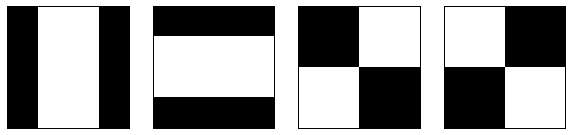

In [327]:
nb_patterns = 4
pattern_width = 4
pattern_height = 4
max_iterations = 10

# Initialize the patterns
X = np.zeros((nb_patterns, pattern_width * pattern_height))

X[0] = [-1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1]
X[1] = [-1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1]
X[2] = [-1, -1, 1, 1, -1, -1, 1, 1, 1, 1, -1, -1, 1, 1, -1, -1]
X[3] = [1, 1, -1, -1, 1, 1, -1, -1, -1, -1, 1, 1, -1, -1, 1, 1]

# Show the patterns
fig, ax = plt.subplots(1, nb_patterns, figsize=(10, 5))

for i in range(nb_patterns):
    ax[i].matshow(X[i].reshape((pattern_height, pattern_width)), cmap='gray')
    ax[i].set_xticks([])
    ax[i].set_yticks([])


In [329]:
X.shape

(4, 16)

[]

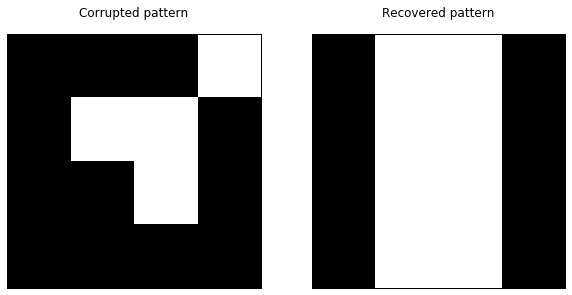

In [348]:
# Train the network
W = np.zeros((pattern_width * pattern_height, pattern_width * pattern_height))

for i in range(pattern_width * pattern_height):
    for j in range(pattern_width * pattern_height):
        if i == j or W[i, j] != 0.0:
            continue
            
        w = 0.0
        
        for n in range(nb_patterns):
            w += X[n, i] * X[n, j]
            
        W[i, j] = w / X.shape[0]
        W[j, i] = W[i, j]
        
# Create a corrupted test pattern
x_test = np.random.choice((-1,1),16)
#np.array([1, -1, 1, 1, -1, -1, 1, 1, -1, 1, -1, -1, 1, 1, 1, 1])

# Recover the original patterns
A = x_test.copy()

for _ in range(max_iterations):
    for i in range(pattern_width * pattern_height):
        A[i] = 1.0 if np.dot(W[i], A) > 0 else -1.0

# Show corrupted and recovered patterns
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].matshow(x_test.reshape(pattern_height, pattern_width), cmap='gray')
ax[0].set_title('Corrupted pattern')
ax[0].set_xticks([])
ax[0].set_yticks([])

ax[1].matshow(A.reshape(pattern_height, pattern_width), cmap='gray')
ax[1].set_title('Recovered pattern')
ax[1].set_xticks([])
ax[1].set_yticks([])


### https://github.com/yosukekatada/Hopfield_network/blob/master/hopfield.py
